![alt text](image.png)

# I. Lý thuyết
# 1. Thuật toán canny
# a. giải thích các bước thuật toán

# Giảm nhiễu
Giảm nhiễu sử dụng lọc Gaussian với ma trận 5x5 để giảm nhiễu ảnh. Tại sao lại cần bước này? vì hình ảnh ban đầu có thể nhiễu, làm giảm nhiễu giúp cho việc phát hiện cạnh chính xác hơn.

# Tính toán gradient
Sau khi đã làm giảm nhiễu ảnh, bước này sẽ sử dụng kernel Sobel để tính đạo hàm theo phương ngang Gx và phương dọc Gy bằng cách sử dụng 2 ma trận kernel ngang và ma trận kernel dọc. Mục đích là xác định các cạnh của ảnh thông qua việc tính toán cường độ gradient, mức độ thay đổi của cường độ sáng khi di chuyển từ điểm ảnh này đến điểm ảnh lân cận giúp xác định cạnh. Và xác định hướng cạnh gradient. Nó được làm tròn đến góc 45 độ gần nhất thành một trong bốn góc, đại diện cho hướng thẳng đứng, hướng ngang và hai hướng chéo.

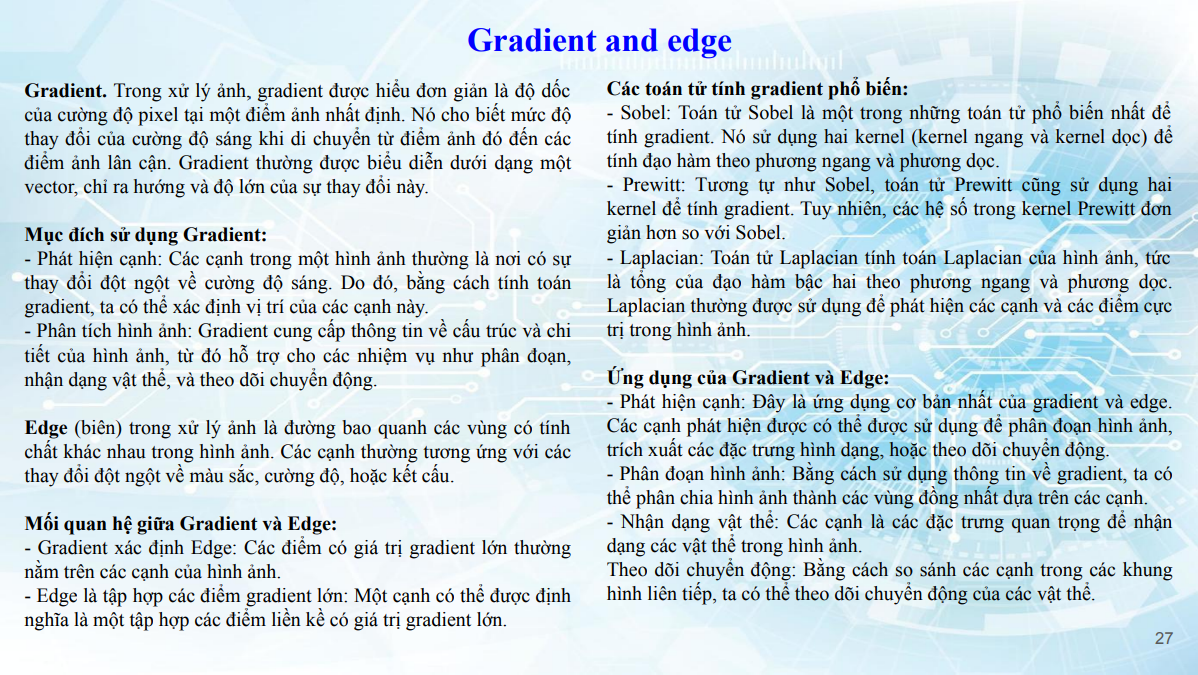

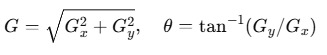

# Non-maximum suppression
Bước này là bước làm mỏng các cạnh. Bằng cách sử dụng ma trận 3x3 chạy qua các px trên ảnh. Quá trình này xem xét độ lớn tại px trung tâm hay px được xử lý hiện tại với 2 px liền kề nằm trong hướng của gradient. Nếu px trung tâm là cực đại (lớn nhất) thì giữ nó lại,  còn nếu nó không phải cực đại so với 2 px liền kề thì độ lớn gradient sẽ được chỉnh thành 0.
Kết quả trả ra là 1 hình ảnh giống với bước tính toán gradient nhưng cạnh mỏng hơn chỉ có độ dày 1 px

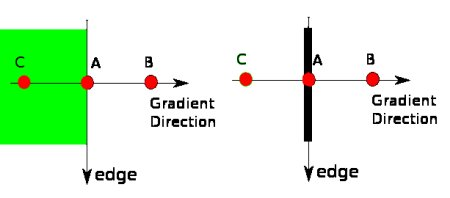

# Ngưỡng kép
Ở bước này có 2 giá trị ngưỡng cao và ngưỡng thấp và 3 loại px mạnh, yếu, ngoại lai. px mạnh là px có cường độ cao và trực tiếp góp phần vào sự hình thành cạnh. px yếu là px có giá trị cường độ không đủ để được coi là mạnh nhưng chưa đủ nhỏ để được coi là ngoại lai. Các px khác được coi là ngoại lai. Ngưỡng cao được sử dụng để xác định các px mạnh (cường độ cao hơn ngưỡng cao). Ngưỡng thấp được sử dụng để xác định các px ngoại lai (cường độ thấp hơn ngưỡng thấp). Tất cả các điểm ảnh có cường độ giữa cả hai ngưỡng đều được gắn là yếu. Bước tiếp theo sẽ giúp ta xác định xem các px yếu sẽ được giữ lại như các px mạnh hay bị loại bỏ như px ngoại lai.

Giải thích là vì sau khi áp dụng bước trên, các điểm ảnh biên sẽ cho ra hình ảnh về các cạnh trong ảnh tuy nhiên vẫn sẽ bị ảnh hưởng sai lệch vì các lý do nào đó. Để xử lý việc đó cần loại bỏ các px có cường độ gradient yếu và giữ lại các điểm ảnh (px) biên có giá trị gradient cao. Bằng cách xác định giá trị ngưỡng cao và thấp.

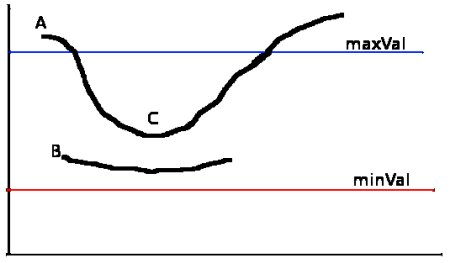

# Theo dõi cạnh
Bước này chuyển đổi các px yếu thành mạnh với điều kiện px hiện tại hay px đang xét có ít nhất 1 px mạnh xung quanh nó. Nếu không thì sẽ bị loại bỏ.
Các px trong cạnh yếu từ các cạnh thật thì sẽ được kết nối với 1 px mạnh trong cạnh mạnh. Trong khi các cạnh nhiễu thì không được kết nối tới các px mạnh trong cạnh mạnh. Ví dụ hình trên: Cạnh A nằm trên ngưỡng cao nên nó là cạnh mạnh và các px nó là px mạnh còn cạnh C nằm giữa 2 ngưỡng thì px trong cạnh C sẽ là px yếu nhưng vì nó được nối với cạnh A nên nó sẽ được biến các px trong nó thành px mạnh và được giữ lại. Còn px trong cạnh B thì là px yếu và không kết nối với ít nhất 1 px mạnh nào hết nên sẽ bị loại bỏ

# b. So Sánh canny với Sobel và Laplacian
- mục tiêu chung của canny và các thuật toán đều là : Tìm vùng mà giá trị pixel thay đổi mạnh (tìm biên)
- canny không phải là phép lọc đơn lẻ nó là một quy trình hoàn chỉnh gồm 5 bước (giảm nhiễu, tính gradient, non-maximum suppression, ngưỡng kép, theo dõi cạnh) Nhờ đó, Canny giúp xác định biên thật chính xác hơn, giảm nhiễu, đồng thời tạo ra đường biên mảnh và liên tục. 
- Trong khi đó, Sobel và Laplacian là các phép lọc phát hiện biên đơn giản và nhanh. Mỗi thuật toán thường chỉ thực hiện một bước tính toán đạo hàm để phát hiện sự thay đổi cường độ sáng. Vì vậy, chỉ cần có sự thay đổi pixel là thuật toán sẽ coi đó là biên, dẫn đến biên thường dày, dễ bị nhiễu và xuất hiện biên giả.

# 2. Các tham số của thuật toán và ảnh hưởng của chúng:

# a. Sigma trong Gaussian filter
- sigma là độ lệch chuẩn của bộ lọc Gaussian
- Quy định mức độ làm mờ ảnh trước khi phát hiện biên
- Sigma càng lớn → ảnh càng mượt → ít nhiễu nhưng mất chi tiết
- Sigma càng nhỏ → giữ chi tiết tốt nhưng dễ nhiễu

# b. Ngưỡng cao ngưỡng thấp.
- Ngưỡng thấp và ngưỡng cao được sử dụng trong bước ngưỡng kép của thuật toán Canny nhằm phân biệt biên thật và nhiễu, đồng thời giữ cho đường biên liên tục

- Sau khi tính độ lớn gradient, mỗi pixel được phân loại như sau:
	+ Gradient >= ngưỡng cao -> Biên mạnh 
	+ Ngưỡng thấp <= Gradient < ngưỡng cao -> Biên yếu 
	+ Gradient < ngưỡng thấp -> Loại bỏ 

- 
	+ Biên yếu chỉ được giữ lại nếu nối với biên mạnh
	+ Biên yếu không liên kết với biên mạnh sẽ bị loại bỏ
- việc xác định ngưỡng thì dự trên histogram gradient

# 3. Ưu điểm và nhược điểm của Canny edge detector. Các ứng dụng thực tế của Canny edge detector

# a. So sánh với các thuật toán khác về độ chính xác, tốc độ, khả năng xử lý nhiễu
- Canny edge detector có tốc độ xử lý chậm hơn so với các thuật toán phát hiện biên khác như Sobel hay Laplacian, do Canny không phải là một phép lọc đơn lẻ mà là một quy trình gồm nhiều bước liên tiếp (làm mờ Gaussian, tính gradient, non-maximum suppression, ngưỡng kép và theo dõi cạnh). Tuy nhiên, chính quy trình này giúp Canny đạt được độ chính xác cao, biên mảnh, liên tục và khả năng khử nhiễu rất tốt.
- 	Ngược lại, các thuật toán phát hiện biên truyền thống (Sobel, Prewitt, Laplacian) thường chỉ là một phép lọc đơn giản, nên tốc độ xử lý nhanh hơn. Tuy nhiên, do không có bước loại bỏ nhiễu hiệu quả và không tối ưu hóa biên, nên kết quả thường kém chính xác hơn, biên dày và dễ bị ảnh hưởng bởi nhiễu.

# b. Trong lĩnh vực nào Canny được sử dụng phổ biến nhất?
- các lĩnh vực phổ biến nhất là :
    + Thị giác máy tính
    + Xử lý ảnh số 
    + Y sinh – Xử lý ảnh y tế
    + Xe tự hành và giao thông thông minh
    + Xử lý ảnh công nghiệp
    + Robot và thị giác robot

# C. Ví dụ cụ thể về các ứng dụng.
- Thị giác máy tính : Phát hiện biên làm bước tiền xử lý cho các bài toán như: Nhận dạng đối tượng, Nhận dạng khuôn mặt, Theo dõi vật thể. giúp làm nổi bật cấu trúc hình dạng của đối tượng.
- Xử lý ảnh số : Phân tích cấu trúc ảnh, Trích xuất đặc trưng hình dạng, Chuẩn bị dữ liệu đầu vào cho các thuật toán cao hơn.
- Y sinh – Xử lý ảnh y tế: Xương trong ảnh X-quang, Mạch máu trong ảnh CT(tia x), MRI (từ trường + songs radio), Biên khối u. Canny được ưa chuộng vì ít nhiễu và biên mảnh, giúp bác sĩ dễ phân tích.
-  Xe tự hành và giao thông thông minh: phát hiện làn đường, biển báo giao thông, biên đường.
- Xử lý ảnh công nghiệp: kiểm tra lỗi sp (lỗi , xước, sai lệch hình dạng). Phát hiện biên để đo kích thước, kiểm tra chất lượng.
- Robot và thị giác robot: Nhận biết vật cản, Xác định hình dạng môi trường, Hỗ trợ điều hướng robot.